In [1]:
import math
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from numpy import concatenate
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
dataset= pd.read_csv('/content/drive/My Drive/DS_Project/ML_dataframe.csv', encoding= 'latin1')


In [4]:
x= dataset.Temperature.values - 273.15
a= x[27375:36500]
n_data_points = len(x)
arr = np.array(x).reshape(n_data_points)
print(arr.shape)
dataset = np.empty((27370,6)) 

for i in range(27365):
    dataset[i] = arr[i:i+6]  

np.random.shuffle(dataset)
n_training_points = 27375

X_train, y_train = dataset[:n_training_points,:5], dataset[:n_training_points,5]

(36500,)


In [5]:
dataset_test = np.empty((9120,6)) 

for i in range(9115):
    dataset_test[i] = arr[i:i+6]  

np.random.shuffle(dataset_test)
n_testing_points = 27375

X_test, y_test = dataset_test[:n_testing_points,:5], dataset_test[:n_testing_points,5]


In [6]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)


# Make predictions on the test data
pred = model.predict(X_test)

In [7]:
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('R2: ', metrics.r2_score(y_test, pred))
print('Correlation: ', stats.pearsonr(y_test, pred)[0])
print('RMSLE: ',metrics.mean_squared_log_error(np.absolute(y_test), np.absolute(pred)))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test, pred))

MSE:  35.31226885881753
MAE:  1.0931605012532897
R2:  0.7199462320852381
Correlation:  0.8499041295192334
RMSLE:  0.053318449981544155
MAPE:  0.6844402655550428


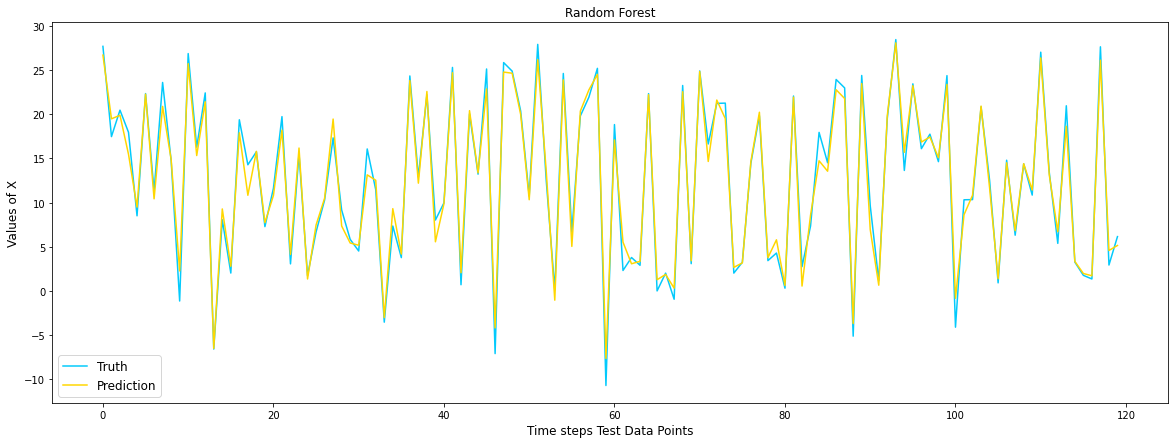

In [8]:
plt.figure(figsize=(20,7))
plt.plot(y_test[9000:9120], label='Truth',color='#03cafc')
plt.plot(pred[9000:9120], label='Prediction',color='gold')

plt.ylabel('Values of X', fontsize=12)
plt.xlabel('Time steps Test Data Points', fontsize=12)
plt.title('Random Forest')
plt.legend(fontsize=12)
# plt.ylim(-20,25)
plt.show()


# Precipitation

In [9]:
dataset= pd.read_csv('/content/drive/My Drive/DS_Project/ML_dataframe.csv', encoding= 'latin1')

In [10]:
x= dataset.Precipitation.values
a= x[27375:36500]
n_data_points = len(x)
arr = np.array(x).reshape(n_data_points)
print(arr.shape)
dataset = np.empty((27370,6)) 

for i in range(27365):
    dataset[i] = arr[i:i+6]  

np.random.shuffle(dataset)
n_training_points = 27375

X_train, y_train = dataset[:n_training_points,:5], dataset[:n_training_points,5]

(36500,)


In [11]:
dataset_test = np.empty((9120,6)) 

for i in range(9115):
    dataset_test[i] = arr[i:i+6]  

np.random.shuffle(dataset_test)
n_testing_points = 27375

X_test, y_test = dataset_test[:n_testing_points,:5], dataset_test[:n_testing_points,5]


In [12]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)


# Make predictions on the test data
pred = model.predict(X_test)

In [13]:
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('R2: ', metrics.r2_score(y_test, pred))
print('Correlation: ', stats.pearsonr(y_test, pred)[0])
print('RMSLE: ',metrics.mean_squared_log_error(np.absolute(y_test), np.absolute(pred)))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test, pred))


MSE:  9.977163322449174
MAE:  1.8172068077034893
R2:  0.847183920523148
Correlation:  0.9733679314022026
RMSLE:  0.4173218157672719
MAPE:  4208227109979.585


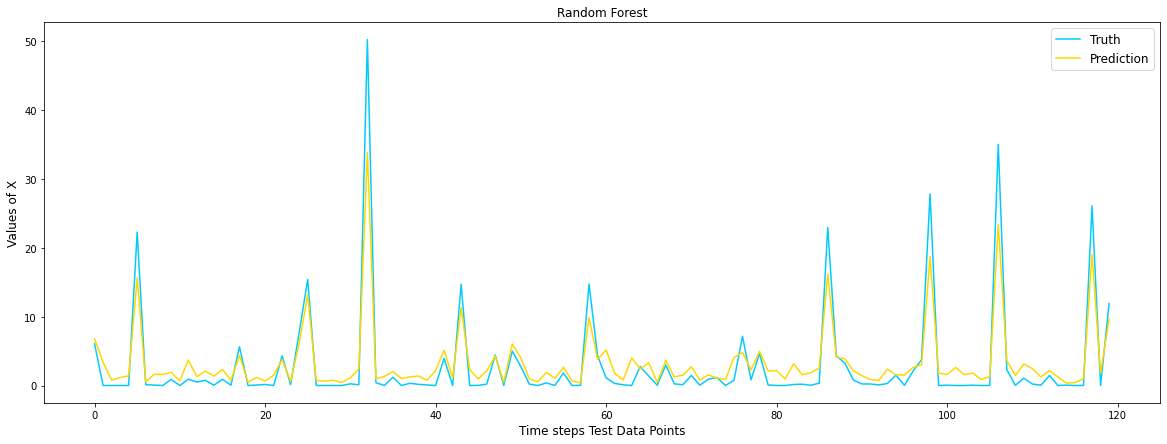

In [14]:
plt.figure(figsize=(20,7))
plt.plot(y_test[9000:9120], label='Truth',color='#03cafc')
plt.plot(pred[9000:9120], label='Prediction',color='gold')

plt.ylabel('Values of X', fontsize=12)
plt.xlabel('Time steps Test Data Points', fontsize=12)
plt.title('Random Forest')
plt.legend(fontsize=12)
# plt.ylim(-20,25)
plt.show()